In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vaini to
nizhneyansk ru
goundam ml
busselton au
esperance au
dikson ru
trincomalee lk
nikolskoye ru
rikitea pf
barentsburg sj
taolanaro mg
qaanaaq gl
namatanai pg
baripada in
yulara au
san policarpo ph
dikson ru
nantucket us
anadyr ru
carnarvon au
souillac mu
ushuaia ar
tautira pf
kloulklubed pw
pacific grove us
campbell river ca
vaini to
ushuaia ar
miyang cn
krasnoshchekovo ru
ilulissat gl
taolanaro mg
qaanaaq gl
kondagaon in
tasiilaq gl
palabuhanratu id
mabaruma gy
marcona pe
salalah om
bluff nz
cape town za
peleduy ru
klaksvik fo
phalaborwa za
busselton au
olafsvik is
pisco pe
ekhabi ru
atuona pf
saint anthony ca
mataura pf
dingle ie
brandfort za
illoqqortoormiut gl
saldanha za
busselton au
nyagan ru
vestmannaeyjar is
saskylakh ru
saldanha za
punta arenas cl
barentsburg sj
chabahar ir
boda cf
saskylakh ru
taolanaro mg
charters towers au
mataura pf
ankang cn
hofn is
viedma ar
huicungo pe
rikitea pf
belyy ru
arraial do cabo br
sur om
springhill ca
nepa nagar in
morondava mg
mataura pf

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [7]:
import requests

from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9d43ca9ef9b262e2d00753fb25762fa"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9d43ca9ef9b262e2d00753fb25762fa


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | goundam
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | trincomalee
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | namatanai
Processing Record 14 of Set 1 | baripada
Processing Record 15 of Set 1 | yulara
Processing Record 16 of Set 1 | san policarpo
Processing Record 17 of Set 1 | nantucket
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | ush

In [11]:
len(cities)

598

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.36,78,20,11.50,TO,2021-09-19 21:18:02
1,Goundam,16.4145,-3.6708,90.59,42,46,15.10,ML,2021-09-19 21:18:03
2,Busselton,-33.6500,115.3333,47.05,81,0,11.12,AU,2021-09-19 21:18:03
3,Esperance,-33.8667,121.9000,53.44,61,80,12.37,AU,2021-09-19 21:18:04
4,Dikson,73.5069,80.5464,36.01,79,100,18.25,RU,2021-09-19 21:18:04
5,Trincomalee,8.5711,81.2335,81.09,81,97,7.56,LK,2021-09-19 21:18:05
6,Nikolskoye,59.7035,30.7861,41.02,76,100,8.41,RU,2021-09-19 21:18:05
7,Rikitea,-23.1203,-134.9692,73.74,76,1,11.54,PF,2021-09-19 21:18:05
8,Qaanaaq,77.4840,-69.3632,15.58,90,93,6.46,GL,2021-09-19 21:18:06
9,Namatanai,-3.6667,152.4333,79.95,78,66,3.58,PG,2021-09-19 21:18:06


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-09-19 21:18:02,-21.2000,-175.2000,75.36,78,20,11.50
1,Goundam,ML,2021-09-19 21:18:03,16.4145,-3.6708,90.59,42,46,15.10
2,Busselton,AU,2021-09-19 21:18:03,-33.6500,115.3333,47.05,81,0,11.12
3,Esperance,AU,2021-09-19 21:18:04,-33.8667,121.9000,53.44,61,80,12.37
4,Dikson,RU,2021-09-19 21:18:04,73.5069,80.5464,36.01,79,100,18.25
5,Trincomalee,LK,2021-09-19 21:18:05,8.5711,81.2335,81.09,81,97,7.56
6,Nikolskoye,RU,2021-09-19 21:18:05,59.7035,30.7861,41.02,76,100,8.41
7,Rikitea,PF,2021-09-19 21:18:05,-23.1203,-134.9692,73.74,76,1,11.54
8,Qaanaaq,GL,2021-09-19 21:18:06,77.4840,-69.3632,15.58,90,93,6.46
9,Namatanai,PG,2021-09-19 21:18:06,-3.6667,152.4333,79.95,78,66,3.58


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

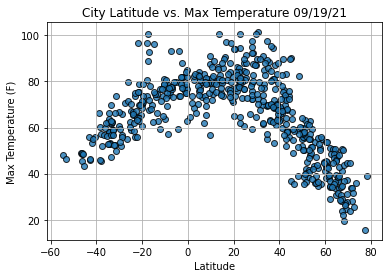

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

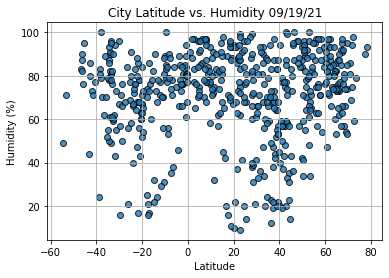

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

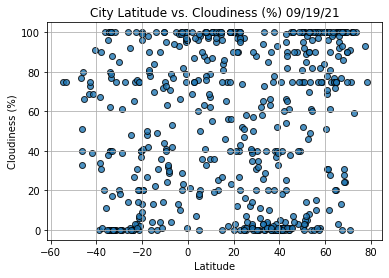

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

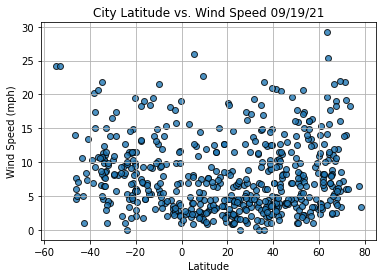

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()